<a href="https://colab.research.google.com/github/FrappucinoGithub/WildCodeSchool/blob/master/ChangementsClimatiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px


In [2]:

# from google.colab import files
# uploaded = files.upload()


In [17]:
df = pd.read_csv('/content/MF_catastrophes.csv')
df.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,Famine,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,India,IND,Southern Asia,Asia,Bengal,NaN,NaN,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1902-0012-GTM,1902,12,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,Guatemala,GTM,Central America,Americas,"Quezaltenango, San Marcos",NaN,Tsunami/Tidal wave,NaN,NaN,NaN,NaN,NaN,8.0,Richter,14,-91,20:20,NaN,1902,4.0,18.0,1902,4.0,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,3.391845
3,1902-0003-GTM,1902,3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,4.0,8.0,1902,4.0,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
4,1902-0010-GTM,1902,10,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,10.0,24.0,1902,10.0,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845


In [4]:
#print("nombre de lignes et de colonnes : ", df.shape)

#print('\n\nintitulé des colonnes :', df.columns)

#print('\n\describe :', df.describe())

## premières visualisations sur bdd globale

TypeError: ignored

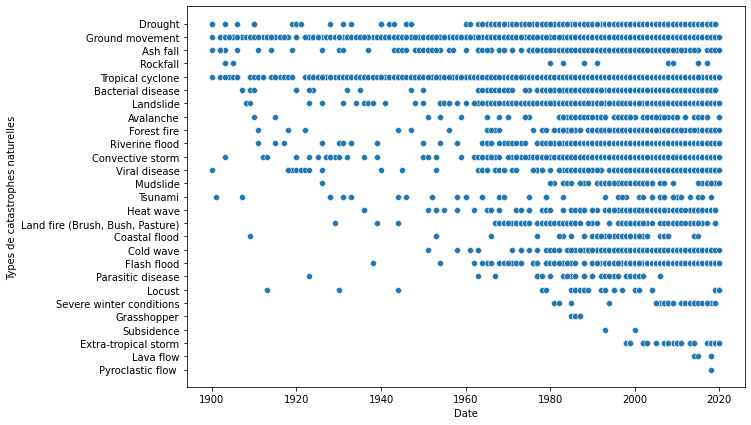

In [19]:
plt.figure(figsize=(10,7))
                
sns.scatterplot(x = "Start Year", 
                y = "Disaster Subtype", 
                data = df) 

plt.xlabel('Date')
plt.ylabel('Types de catastrophes naturelles')
plt.title('Nbre de catastrophes naturelles entre 1900 et 2019')
plt.legend()
plt.show()

TypeError: ignored

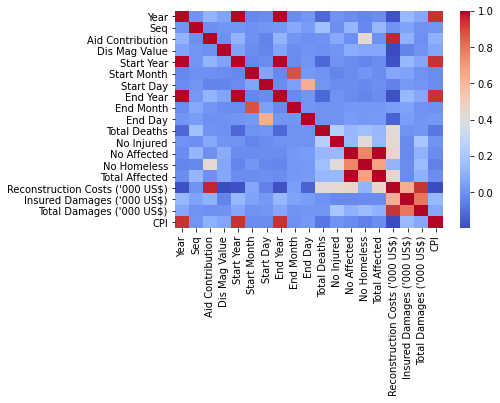

In [18]:
#Heatmap Correlation

sns.heatmap(df.corr(), 
            cmap = "coolwarm")

plt.title('Carte des corrélations')
plt.show()

#Récupération des données qualifiées "Natural" > "Climatological & Meteorologique"

In [20]:
df_propres = df[(df['Disaster Subgroup'] == 'Climatological') | (df['Disaster Subgroup'] == 'Meteorological') | (df['Disaster Subgroup'] == 'Hydrological') | (df['Disaster Subgroup'] == 'Geophysical') ]   #récupérer les lignes qui correspondent à climato OU (|) météo

df_propres.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,Famine,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,India,IND,Southern Asia,Asia,Bengal,NaN,NaN,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1902-0012-GTM,1902,12,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,Guatemala,GTM,Central America,Americas,"Quezaltenango, San Marcos",NaN,Tsunami/Tidal wave,NaN,NaN,NaN,NaN,NaN,8.0,Richter,14,-91,20:20,NaN,1902,4.0,18.0,1902,4.0,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,3.391845
3,1902-0003-GTM,1902,3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,4.0,8.0,1902,4.0,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
4,1902-0010-GTM,1902,10,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,10.0,24.0,1902,10.0,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845


# Trier et nettoyer les données par :
## - par type de colonnes

In [21]:
df_propres_morts = df_propres.drop(columns=['Dis No','Seq', 'End Year','End Month','End Day', 'Start Year', 'Start Day','Entry Criteria', 'Local Time', 'Aid Contribution', 'ISO', 'Event Name', 'Appeal', 'Declaration', 'OFDA Response', 'Declaration', 'Declaration'])
df_propres_morts


,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Country,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,River Basin,Start Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900,Natural,Climatological,Drought,Drought,NaN,Cabo Verde,Western Africa,Africa,Countrywide,NaN,Famine,NaN,NaN,Km2,NaN,NaN,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900,Natural,Climatological,Drought,Drought,NaN,India,Southern Asia,Asia,Bengal,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1902,Natural,Geophysical,Earthquake,Ground movement,NaN,Guatemala,Central America,Americas,"Quezaltenango, San Marcos",NaN,Tsunami/Tidal wave,NaN,8.0,Richter,14,-91,NaN,4.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,3.391845
3,1902,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Guatemala,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
4,1902,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Guatemala,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15559,2020,Natural,Hydrological,Flood,Flash flood,NaN,Yemen,Western Asia,Asia,Aden Governorate,Torrential rains,NaN,NaN,18949.0,Km2,132.586,444.372,NaN,4.0,10.0,30.0,150000.0,NaN,150030.0,NaN,NaN,NaN,NaN
15560,2020,Natural,Hydrological,Flood,NaN,NaN,Yemen,Western Asia,Asia,"Hadhramaut, Shabwa, Al Mahrah","Heavy rains, cyclone Nisarga",NaN,NaN,NaN,Km2,NaN,NaN,NaN,6.0,16.0,85.0,130.0,NaN,215.0,NaN,NaN,NaN,NaN
15561,2020,Natural,Hydrological,Flood,NaN,NaN,Yemen,Western Asia,Asia,"Lahij, Ibb, Shabwah, Abyan and Sana'a governor...",Heavy rains,NaN,NaN,NaN,Km2,NaN,NaN,NaN,7.0,172.0,124.0,NaN,NaN,124.0,NaN,NaN,NaN,NaN
15562,2020,Natural,Hydrological,Flood,NaN,NaN,Congo (the Democratic Republic of the),Middle Africa,Africa,"Bukavu, Uvira (South Kivu)",NaN,NaN,NaN,NaN,Km2,NaN,NaN,Mulongwe river,4.0,52.0,80.0,92500.0,NaN,92580.0,NaN,NaN,NaN,NaN


## - par types de sous groupes désastres 

In [22]:
#virer les valeurs Geophysical et Biological dans la col Disaster Subgroup

dfNewTable = df_propres_morts.drop(df_propres_morts[(df_propres_morts['Disaster Subgroup'] == 'Geophysical') | (df_propres_morts['Disaster Subgroup'] == 'Biological')].index)

dfNewTable

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Country,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,River Basin,Start Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900,Natural,Climatological,Drought,Drought,NaN,Cabo Verde,Western Africa,Africa,Countrywide,NaN,Famine,NaN,NaN,Km2,NaN,NaN,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900,Natural,Climatological,Drought,Drought,NaN,India,Southern Asia,Asia,Bengal,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
7,1904,Natural,Meteorological,Storm,Tropical cyclone,NaN,Bangladesh,Southern Asia,Asia,Chittagong,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
12,1906,Natural,Hydrological,Flood,NaN,NaN,Belgium,Western Europe,Europe,Louvain region,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
13,1906,Natural,Hydrological,Flood,NaN,NaN,Belgium,Western Europe,Europe,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15559,2020,Natural,Hydrological,Flood,Flash flood,NaN,Yemen,Western Asia,Asia,Aden Governorate,Torrential rains,NaN,NaN,18949.0,Km2,132.586,444.372,NaN,4.0,10.0,30.0,150000.0,NaN,150030.0,NaN,NaN,NaN,NaN
15560,2020,Natural,Hydrological,Flood,NaN,NaN,Yemen,Western Asia,Asia,"Hadhramaut, Shabwa, Al Mahrah","Heavy rains, cyclone Nisarga",NaN,NaN,NaN,Km2,NaN,NaN,NaN,6.0,16.0,85.0,130.0,NaN,215.0,NaN,NaN,NaN,NaN
15561,2020,Natural,Hydrological,Flood,NaN,NaN,Yemen,Western Asia,Asia,"Lahij, Ibb, Shabwah, Abyan and Sana'a governor...",Heavy rains,NaN,NaN,NaN,Km2,NaN,NaN,NaN,7.0,172.0,124.0,NaN,NaN,124.0,NaN,NaN,NaN,NaN
15562,2020,Natural,Hydrological,Flood,NaN,NaN,Congo (the Democratic Republic of the),Middle Africa,Africa,"Bukavu, Uvira (South Kivu)",NaN,NaN,NaN,NaN,Km2,NaN,NaN,Mulongwe river,4.0,52.0,80.0,92500.0,NaN,92580.0,NaN,NaN,NaN,NaN


#export de dfNewTable

In [25]:
dfNewTable.to_csv('MF_dfNewTable')

# Base de données des tempêtes

In [26]:
df_tempetes = dfNewTable[dfNewTable['Disaster Type'] == 'Storm']
df_tempetes.head()



,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Country,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,River Basin,Start Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
7,1904,Natural,Meteorological,Storm,Tropical cyclone,NaN,Bangladesh,Southern Asia,Asia,Chittagong,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5223
14,1906,Natural,Meteorological,Storm,Tropical cyclone,NaN,Hong Kong,Eastern Asia,Asia,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,9.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,3.5223
18,1909,Natural,Meteorological,Storm,Tropical cyclone,NaN,Bangladesh,Southern Asia,Asia,Bakerganj,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,10.0,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5223
19,1909,Natural,Meteorological,Storm,Tropical cyclone,NaN,Bangladesh,Southern Asia,Asia,West Sundarbans,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5223
22,1909,Natural,Meteorological,Storm,Tropical cyclone,NaN,Haiti,Caribbean,Americas,"Cul de Sac,Leogane",NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,11.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5223


# 1 / Evolution du nb de castatrophes naturelles par type de désastre et par continent

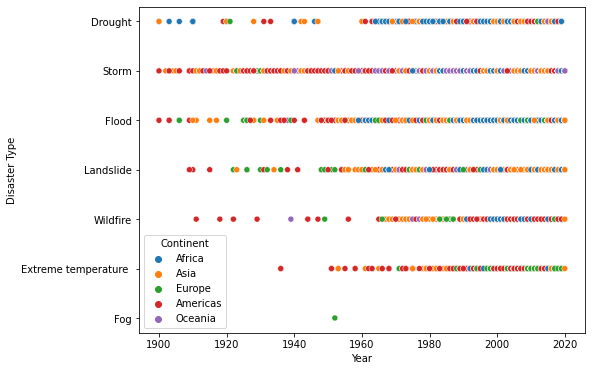

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Year', y='Disaster Type', hue='Continent', data=dfNewTable) 
plt.show()

## 3 - traiter les valeurs manquantes

###Bdd avec uniquement les lignes dont col Total Affected est remplie

In [39]:
 # affiche les lignes avec des valeurs manquantes dans total affected
# TotalAffected = pd.isnull(dfNewTable["Total Affected"])   #true = valeur manquante
# dfNewTable[TotalAffected]  


  #afficher les lignes qui contiennent une valeur dans Total Affected
df_totalAffected = pd.notnull(dfNewTable["Total Affected"])
df_PeopleAffected = dfNewTable[df_totalAffected]

df_PeopleAffected.head()

,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Country,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,River Basin,Start Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
33,1911,Natural,Climatological,Wildfire,Forest fire,NaN,Canada,Northern America,Americas,"Cochrane (and Northern Region), Ontario",NaN,NaN,NaN,1294994.0,Km2,NaN,NaN,NaN,7.0,73.0,NaN,NaN,200.0,200.0,NaN,NaN,NaN,3.652756
35,1912,Natural,Meteorological,Storm,Convective storm,Tornado,Canada,Northern America,Americas,"Regina, Saskatchewan",NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,6.0,28.0,200.0,NaN,2500.0,2700.0,NaN,NaN,5000.0,3.783211
38,1915,Natural,Hydrological,Landslide,Avalanche,NaN,Canada,Northern America,Americas,"Cooper Mine, British Columbia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,56.0,22.0,NaN,NaN,22.0,NaN,NaN,NaN,3.965849
39,1915,Natural,Hydrological,Flood,Riverine flood,NaN,China,Eastern Asia,Asia,Guangzhou,NaN,NaN,NaN,3000.0,Km2,NaN,NaN,NaN,NaN,NaN,NaN,3000000.0,NaN,3000000.0,NaN,NaN,NaN,3.965849
43,1917,Natural,Hydrological,Flood,Riverine flood,NaN,China,Eastern Asia,Asia,Tianjin,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,NaN,NaN,635000.0,NaN,635000.0,NaN,NaN,NaN,5.022539


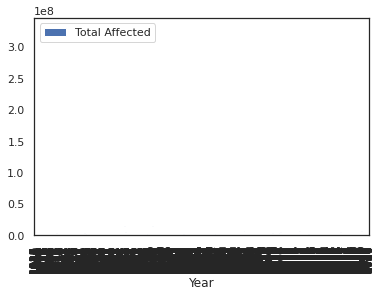

In [40]:

df_PeopleAffected.plot.bar(x="Year", y="Total Affected")

plt.show()

# 3 - Evolution du nombre de catastrophes annuelles par continent

In [29]:
#pivot table total affected par continent et par type de désastre

nbCataParAnEtContinent = pd.pivot_table(dfNewTable, 
                                        values='Disaster Subgroup',
                                        index=['Year'],
                                        columns=['Continent'], 
                                        aggfunc='count')
print(nbCataParAnEtContinent)

Continent  Africa  Americas   Asia  Europe  Oceania
Year                                               
1900          1.0       2.0    1.0     NaN      NaN
1902          NaN       NaN    1.0     NaN      NaN
1903          1.0       4.0    NaN     NaN      NaN
1904          NaN       NaN    1.0     NaN      NaN
1905          NaN       NaN    1.0     NaN      NaN
...           ...       ...    ...     ...      ...
2016         46.0      77.0  137.0    24.0     10.0
2017         44.0      97.0  131.0    36.0      7.0
2018         45.0      59.0  125.0    49.0     11.0
2019         89.0      72.0  139.0    53.0      7.0
2020         30.0      22.0   76.0    16.0     11.0

[118 rows x 5 columns]


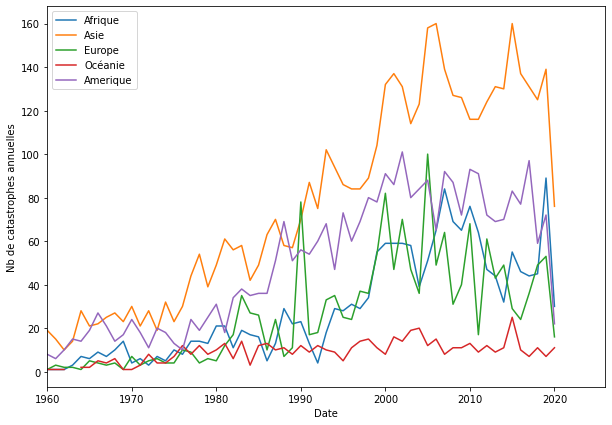

In [14]:

plt.figure(figsize=(10,7))


sns.lineplot(x= 'Year',
             y= 'Africa', 
             label= 'Afrique',         
             data=nbCataParAnEtContinent)
sns.lineplot(x= 'Year',
             y= 'Asia',   
             label= 'Asie',    
             data=nbCataParAnEtContinent)

sns.lineplot(x= 'Year',
             y= 'Europe',   
             label= 'Europe',     
             data=nbCataParAnEtContinent)

sns.lineplot(x= 'Year',
             y= 'Oceania',   
             label= 'Océanie',     
             data=nbCataParAnEtContinent)

sns.lineplot(x= 'Year',
             y= 'Americas',   
             label= 'Amerique',     
             data=nbCataParAnEtContinent)

plt.xlim(1960, None)  #pour modifier l'axe des abscisses

plt.title='Evolution du nb de catastrophes naturelles annuelles par continent' 
plt.xlabel("Date")
plt.ylabel("Nb de catastrophes annuelles")


plt.show()

###Export de la bdd nbCataParAnEtContinent

In [41]:
nbCataParAnEtContinent.to_csvto_csv('MF_to_nbCataParAnEtContinent.csv')

AttributeError: ignored

#évolution du nombre de catastrophes par type de catas ou par continent

TypeError: ignored

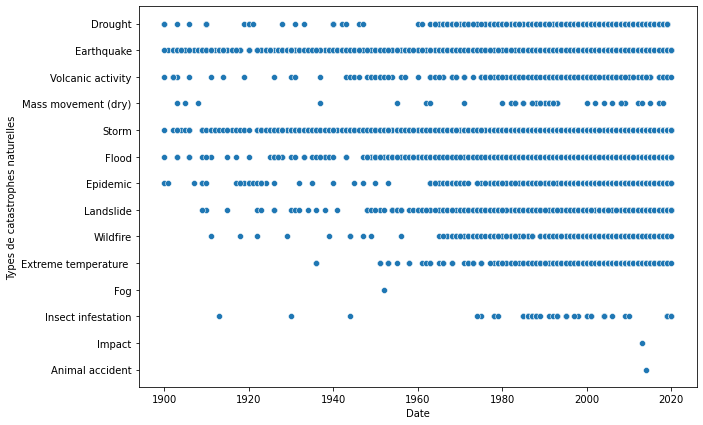

In [15]:
plt.figure(figsize=(10,7))
                
sns.scatterplot(x = "Year", 
                y = 'Disaster Type', 
                data = df) 

plt.xlabel('Date')
plt.ylabel('Types de catastrophes naturelles')
plt.title('Nbre de catastrophes naturelles entre 1900 et 2019')
plt.legend()
plt.show()

In [ ]:
# pour savoir quelle quantité attendre 
Nb_desastres = df_propres['Disaster Type'].count()
print(Nb_desastres)

In [ ]:
# quantité par type de catastrophes
groupir = df_propres.groupby('Disaster Type').count()
print(groupir)

## Evolution du volume de catastrophes par types de catastrophes

TypeError: ignored

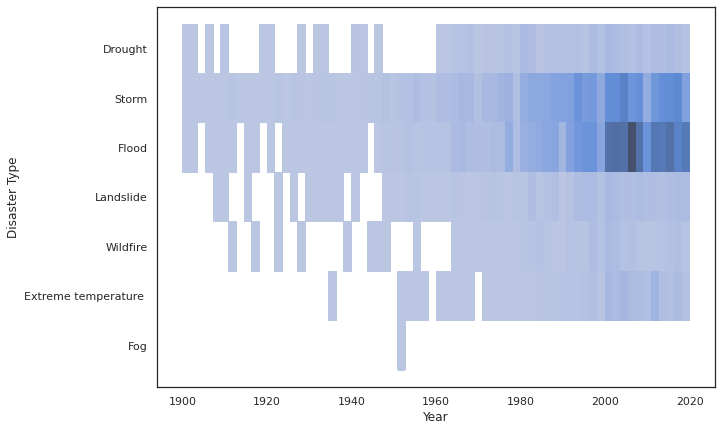

In [42]:
plt.figure(figsize=(10,7))


sns.histplot(x = "Year", 
            y = 'Disaster Type',
            data = dfNewTable) 
plt.title('Types de catastrophes naturelles climatiques les plus fréquentes')
plt.show()

#pivot table des tempetes pour avoir le nb de tempetes par année et par type de tempetes

In [ ]:
nbTempetes = pd.pivot_table(df_tempetes, 
                            values='Disaster Type',
                            index=['Year'],
                            columns=['Disaster Subtype'],
                            aggfunc='count')
print(nbTempetes)

In [ ]:
df_tempetes2 = df_tempetes['Year'].value_counts()

df_tempetes2 = pd.DataFrame(df_tempetes2)

df_tempetes2 = df_tempetes2.reset_index()

df_tempetes2 = df_tempetes2.rename(columns={'index' : 'Annee' , 'Year': 'Nb catastrophes'})

df_tempetes2 = df_tempetes2.sort_values('Annee')

df_tempetes2

In [ ]:
sns.lineplot(x= 'Annee',
             y= 'Nb catastrophes',   
             data=df_tempetes2)
plt.show()


## focus sur les tempêtes >> projections à 2050

In [ ]:
# Calcul du model polynominal
Xaxis = df_tempetes2['Annee']
Yaxis = df_tempetes2['Nb catastrophes']
model = np.polyfit( x = Xaxis, y = Yaxis, deg = 2  ) 

In [ ]:
# Insertion des données calculé sur le dataset
df_tempetes2['Prédiction'] = df_tempetes2['Annee'].apply(lambda x : round(np.poly1d(model)(x),2)) 

In [ ]:
#Utilisation du polymodel avec les données 
sns.lineplot(x = 'Annee', y  = 'Nb catastrophes', data = df_tempetes2)
sns.lineplot(x = 'Annee', y = 'Prédiction', data = df_tempetes2)
plt.show()

In [ ]:
# creation d'un DF avec prediction pour 2050
year = np.arange(1900, 2051)
df_model = pd.DataFrame(year)
df_model.columns = ['Annee']
df_model['Prédiction'] = df_model['Annee'].apply(lambda x : round(np.poly1d(model)(x),2) )
df1 = df_tempetes2[['Annee', 'Nb catastrophes']]
df_model = pd.merge(df_model, df1, how= 'left' )
df_model

In [ ]:
sns.lineplot(x = 'Annee', y  = 'Nb catastrophes', data = df_model)
sns.lineplot(x = 'Annee', y = 'Prédiction', data = df_model)
plt.show()

## évolution du nombre de catastrophes par continent

In [ ]:
table = pd.pivot_table(df_propres, values='Disaster Subtype', index=['Continent'],
                    columns=['Year'], aggfunc='count')
print(table)

# projection évolution du nombre de tempêtes / ou inondations ?

In [ ]:
X_axis = df_weather['DAY_OF_YEAR']
Y_axis = df_weather['MAX_TEMPERATURE_C']

polymodel = np.polyfit( x = X_axis, y = Y_axis, deg = 10 )  

X_min = X_axis.min()
X_max = X_axis.max()

array_ = np.arange(X_min, X_max)

np.poly1d(model)(array_)
poly_vals = np.poly1d(polymodel)(array_)


sns.scatterplot(df_weather['DAY_OF_YEAR'], df_weather['MAX_TEMPERATURE_C']) 
plt.plot(array_, poly_vals, c='r')
plt.show()


In [ ]:
df_Afrique =  dfNewTable[dfNewTable['Continent']=='Africa']

df_Afrique.head()

In [ ]:
# pour exporter ma bdd propre
df_propres.to_csv('bdd_catastrophes')
